# GROUP TACKLE

### predicting the relapse from gene expression data

$\bullet$ USMAN ABDUL-GANIY

$\bullet$ AWA SAMAKE

$\bullet$ BADRI BERRABAH

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# machine learning tools: various methods from scikit-learn
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, ParameterGrid, StratifiedKFold
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFE, RFECV, SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA, KernelPCA, FastICA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import parfit.parfit as pf
import matplotlib.patches as mpatches
import lightgbm as lgb
import catboost as cat
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

### Data Summary

In [2]:
data_xtrain = pd.read_csv('xtrain.txt', index_col=0, header=None, sep='\t').T
data_xtest = pd.read_csv('xtest.txt', index_col=0, header=None, sep='\t').T
data_ytrain = pd.read_csv('ytrain.txt', header=None, names='y', sep='\t')

In [3]:
data_xtrain.head()

,x10006_at,x10007_at,x100129361_at,x100130449_at,x100130633_at,x100133941_at,x10014_at,x10016_at,x100188893_at,x10019_at,...,x9976_at,x9978_at,x997_at,x9984_at,x9987_at,x9988_at,x9989_at,x9994_at,x9997_at,x9_at
1,8.44,7.84,9.23,2.20,4.93,10.31,7.85,9.91,11.37,3.48,...,7.71,11.32,6.37,8.63,8.61,7.42,8.79,4.70,7.23,8.28
2,7.93,8.47,7.77,2.48,6.70,11.03,3.33,9.53,10.91,4.28,...,9.98,10.40,5.96,7.61,9.51,8.20,9.27,4.70,6.70,12.78
3,7.53,7.49,9.49,5.66,5.99,8.87,3.48,8.02,10.73,4.07,...,8.34,10.57,6.92,8.20,8.71,8.56,8.90,4.70,7.70,12.22
4,7.72,8.38,8.03,5.22,6.95,2.73,4.06,9.26,10.90,7.40,...,9.05,10.92,5.73,8.44,9.18,7.86,9.30,5.58,7.95,12.18
5,7.89,7.75,6.99,2.20,7.06,11.38,3.65,9.22,10.37,3.89,...,9.16,10.73,7.45,7.79,9.15,7.97,8.50,4.70,6.63,12.12


In [4]:
describe = data_xtrain.describe()
describe

,x10006_at,x10007_at,x100129361_at,x100130449_at,x100130633_at,x100133941_at,x10014_at,x10016_at,x100188893_at,x10019_at,...,x9976_at,x9978_at,x997_at,x9984_at,x9987_at,x9988_at,x9989_at,x9994_at,x9997_at,x9_at
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,8.177011,8.061848,8.200543,2.879457,6.999783,10.059457,3.839783,9.201739,10.927228,4.749837,...,9.038261,11.070870,5.862935,8.049728,9.535272,8.427446,9.180272,5.161576,7.427174,8.157935
std,0.646031,0.481127,0.750500,1.372735,0.778613,1.825424,0.634312,0.742043,0.415874,1.050290,...,1.412595,0.501227,1.050994,0.633328,0.424735,0.620824,0.677722,0.733061,0.945051,3.606550
min,6.210000,6.490000,5.860000,2.190000,3.710000,2.730000,2.940000,7.110000,9.970000,2.510000,...,3.780000,9.820000,3.360000,5.750000,8.460000,6.700000,6.350000,4.450000,3.840000,2.480000
25%,7.790000,7.757500,7.802500,2.200000,6.605000,9.502500,3.440000,8.735000,10.670000,4.055000,...,8.485000,10.737500,5.327500,7.647500,9.270000,8.037500,8.842500,4.700000,6.847500,4.475000
50%,8.105000,8.055000,8.190000,2.200000,7.030000,10.300000,3.730000,9.235000,10.920000,4.575000,...,9.260000,11.070000,5.790000,8.085000,9.570000,8.460000,9.245000,4.790000,7.475000,8.695000
75%,8.582500,8.350000,8.610000,2.792500,7.492500,11.030000,4.062500,9.592500,11.200000,5.252500,...,9.992500,11.422500,6.450000,8.442500,9.832500,8.805000,9.625000,5.310000,8.082500,11.522500
max,10.000000,9.710000,10.910000,9.490000,8.890000,13.540000,7.850000,12.820000,12.840000,8.550000,...,11.350000,12.230000,8.640000,9.720000,10.730000,10.330000,11.120000,8.510000,9.750000,13.380000


In [5]:
describe.loc[['min', 'max'],:]

,x10006_at,x10007_at,x100129361_at,x100130449_at,x100130633_at,x100133941_at,x10014_at,x10016_at,x100188893_at,x10019_at,...,x9976_at,x9978_at,x997_at,x9984_at,x9987_at,x9988_at,x9989_at,x9994_at,x9997_at,x9_at
min,6.21,6.49,5.86,2.19,3.71,2.73,2.94,7.11,9.97,2.51,...,3.78,9.82,3.36,5.75,8.46,6.70,6.35,4.45,3.84,2.48
max,10.00,9.71,10.91,9.49,8.89,13.54,7.85,12.82,12.84,8.55,...,11.35,12.23,8.64,9.72,10.73,10.33,11.12,8.51,9.75,13.38


In [6]:
print('min =', data_xtrain.values.min(), '\n', 'max =', data_xtrain.values.max())

min = 2.19 
 max = 15.53


## Model definition

In [7]:
model_lrcv = LogisticRegressionCV(Cs=10, cv=StratifiedKFold(2), max_iter=1000)
model_rccv = RidgeClassifierCV(alphas=1/np.linspace(1e-3,5,10), cv=StratifiedKFold(2))
model_linearsvc = LinearSVC(dual=True, max_iter=10000)
model_svc = SVC(kernel='linear')
model_dtc = DecisionTreeClassifier()
model_rfc = RandomForestClassifier()
model_etc = ExtraTreesClassifier()
model_gbc = GradientBoostingClassifier()
model_sgd = SGDClassifier(max_iter=10000, validation_fraction=0.3, tol=1e-3)
model_lgb = lgb.LGBMClassifier()
model_xgb = xgb.XGBClassifier()
model_catb = cat.CatBoostClassifier(iterations=20, depth=15)

## Feature Selection

In [8]:
def recursive_feature_elimination(model, X, y):
    """This function extracts useful feature using CV"""
    # The "accuracy" scoring is proportional to the number of correct
    # classifications
    rfecv = RFECV(estimator=model, step=100, cv=StratifiedKFold(2),
                  scoring='accuracy')
    rfecv.fit(X, y)

    print("Optimal number of features : %d" % rfecv.n_features_)

    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()
    
    return rfecv

In [9]:
def model_feature_selection(model, X, y):
    """feature selection from model"""
    model_select = SelectFromModel(model, prefit=False)
    model_fit = model_select.fit(X, y)

    return model_fit

## Data splitting for Model building

In [10]:
train_x = data_xtrain.values
test_x = data_xtest.values
train_y = data_ytrain.values.ravel()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.4, random_state=1011)

In [12]:
def training(model, selection_type, x_train, y_train, x_test, y_test, X_test=None):
    data = [type(model).__name__]
    if X_test is None:
        
        transformer = selection_type(model, x_train, y_train)
        train_transformer = transformer.transform(x_train)
        test_transformer = transformer.transform(x_test)
        #X_selected = transformer.transform(X)
        data.append(train_transformer.shape[1])
        #X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.4, random_state=1011)
        clf = model.fit(train_transformer, y_train)
        try:
            predict_df = clf.decision_function(test_transformer)
        except:
            predict_df = clf.predict_proba(test_transformer)[:,1]
        data.append(accuracy_score(y_train, clf.predict(train_transformer)))
        data.append(accuracy_score(y_test, clf.predict(test_transformer)))
        data.append(roc_auc_score(y_test, predict_df))
        return data, predict_df
    else:
        transformer = selection_type(model, x_train, y_train)
        
        X_test_selected = transformer.transform(X_test)
        X_selected = transformer.transform(x_train)
        clf = model.fit(X_selected, y_train)
        predict_df = clf.decision_function(X_test_selected)
        return data, predict_df
    

## Parameters Tuning 

In [13]:
param_rf = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': np.arange(200,1000,200)}

param_dt = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': np.arange(2,15), 
          'min_samples_leaf': np.arange(1,11),
          'random_state':[123]}

param_lgb = {'learning_rate':  np.linspace(0.001, 0.1, 10),
          'boosting_type': ['gbdt', 'rf'],
          'sub_feature' : np.arange(2, 5),
          'num_leaves' : np.arange(5,50,5),
          'max_depth' : np.arange(5,30,5)
         }
param_sgd = {
    'alpha': [1e-3, 1e-2, 1e-1, 1e0, 1e1], # learning rate
    'n_iter': [1000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
}

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    1.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


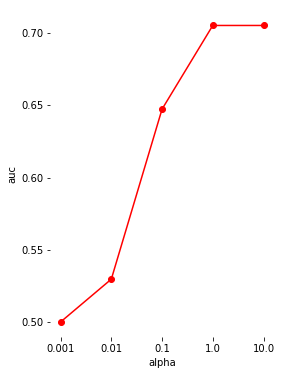

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   53.9s
[Paralle

-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 450 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0176s.) Setting batch_size=22.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s


Too many dimensions to plot.
-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done 390 out of 390 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done 390 out of 390 | elapsed:    0.4s finished


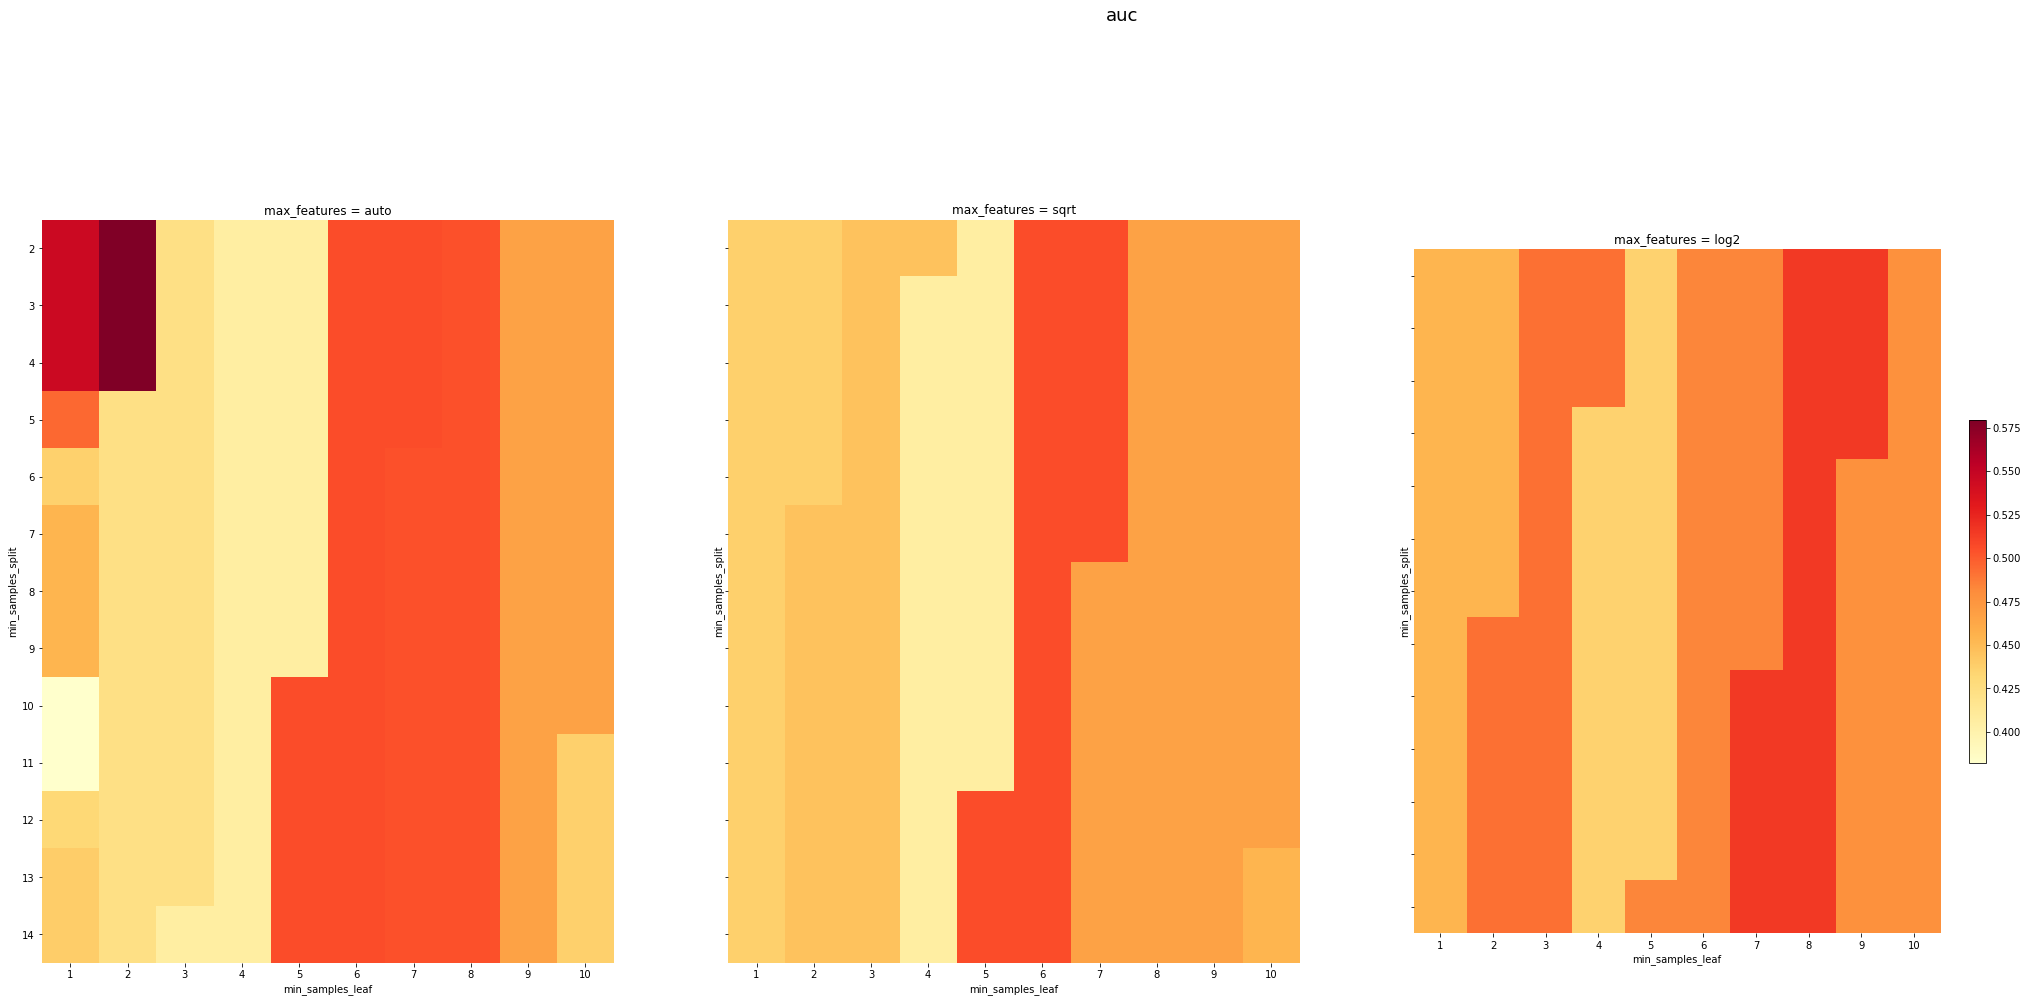

In [11]:
model_sgd_best, bestScore, allModels, allScores = pf.bestFit(model_sgd, ParameterGrid(param_sgd),
           x_train, y_train, x_test, y_test, 
           metric = roc_auc_score,
           scoreLabel = "auc")

model_rfc_best, bestScore, allModels, allScores = pf.bestFit(model_rfc, ParameterGrid(param_rf),
           x_train, y_train, x_test, y_test, 
           metric = roc_auc_score,
           scoreLabel = "auc")

model_dtc_best, bestScore, allModels, allScores = pf.bestFit(model_dtc, ParameterGrid(param_dt),
           x_train, y_train, x_test, y_test, 
           metric = roc_auc_score,
           scoreLabel = "auc")

## Result Summary

In [12]:
MODELS = [model_lrcv, model_rccv, model_linearsvc, model_svc, model_dtc, model_dtc_best, model_rfc, model_rfc_best, model_etc, model_gbc, model_sgd, model_sgd_best, model_lgb, model_xgb]

Optimal number of features : 454


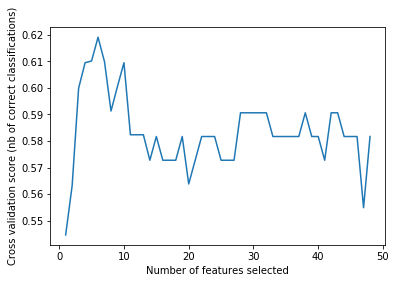

Optimal number of features : 854


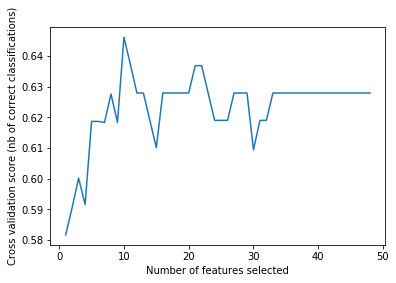

Optimal number of features : 354


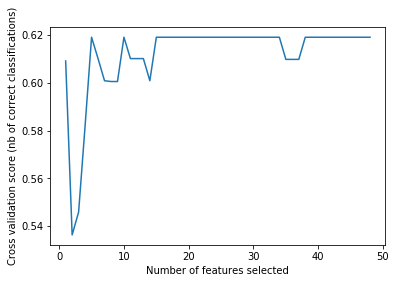

Optimal number of features : 954


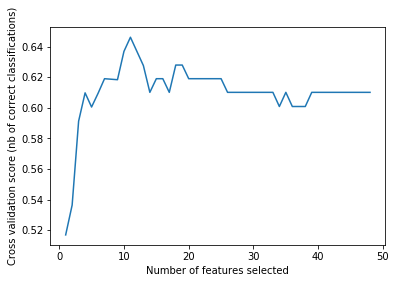

Optimal number of features : 3854


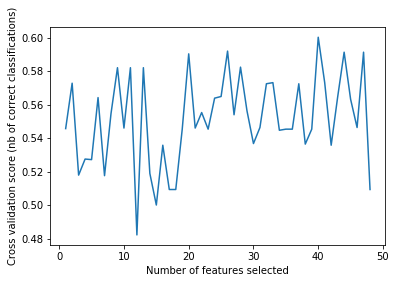

Optimal number of features : 2854


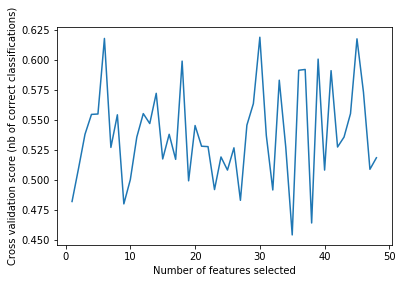

Optimal number of features : 1654


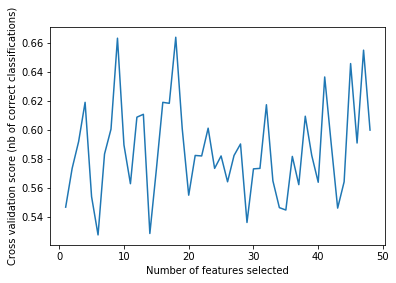

Optimal number of features : 1754


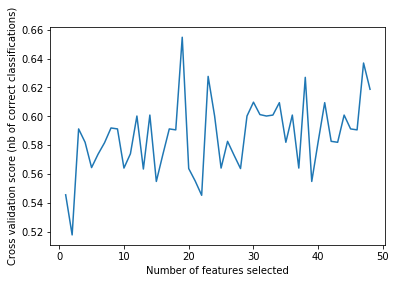

Optimal number of features : 1454


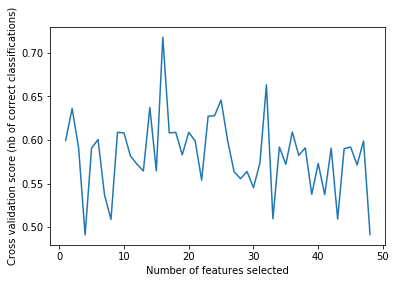

Optimal number of features : 2554


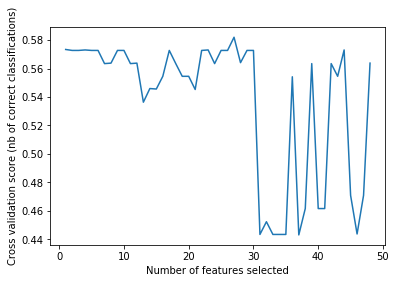

Optimal number of features : 1954


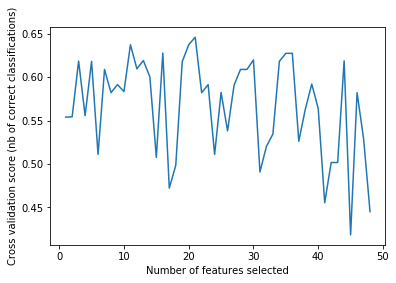

Optimal number of features : 454


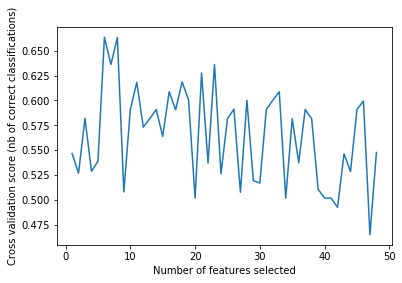

Optimal number of features : 54


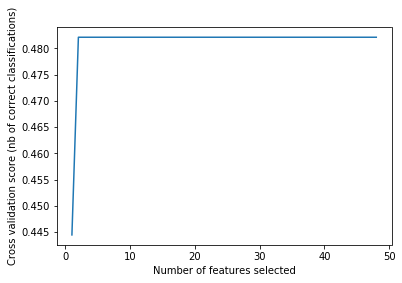

Optimal number of features : 54


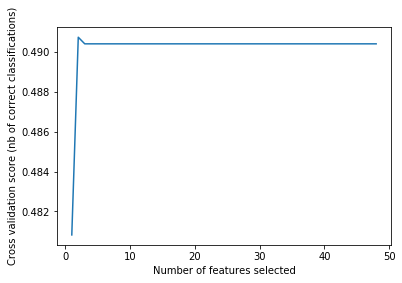

In [13]:
result = pd.DataFrame(index=['n_feature', 'train_accuracy', 'test_accuracy', 'roc_auc_score'])
prediction = pd.DataFrame()
for model in MODELS:
    dat, test_prob = training(model, recursive_feature_elimination, x_train, y_train, x_test, y_test)
    KK = pd.DataFrame(data=dat[1:],index=result.index, columns=[dat[0]])
    pred = pd.DataFrame(test_prob, columns=[dat[0]])
    prediction = pd.concat([prediction, pred], axis=1)
    result = pd.concat([result,KK], join_axes=[result.index], axis=1)

In [14]:
result1 = pd.DataFrame(index=['n_feature', 'train_accuracy', 'test_accuracy', 'roc_auc_score'])
prediction1 = pd.DataFrame()
for model in MODELS:
    dat, test_prob = training(model, model_feature_selection, x_train, y_train, x_test, y_test)
    KK = pd.DataFrame(data=dat[1:],index=result1.index, columns=[dat[0]])
    pred = pd.DataFrame(test_prob, columns=[dat[0]])
    prediction1 = pd.concat([prediction1, pred], axis=1)
    result1 = pd.concat([result1,KK], join_axes=[result.index], axis=1)

In [15]:
result

,LogisticRegressionCV,RidgeClassifierCV,LinearSVC,SVC,DecisionTreeClassifier,DecisionTreeClassifier,RandomForestClassifier,RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,SGDClassifier,SGDClassifier,LGBMClassifier,XGBClassifier
n_feature,454.000000,854.000000,354.000000,954.000000,3854.000000,2854.000000,1654.000000,1754.000000,1454.000000,2554.000000,1954.000000,454.000000,54.000000,54.000000
train_accuracy,1.000000,1.000000,1.000000,1.000000,1.000000,0.954545,0.990909,1.000000,1.000000,1.000000,1.000000,0.990909,1.000000,1.000000
test_accuracy,0.648649,0.648649,0.594595,0.648649,0.500000,0.540541,0.716216,0.716216,0.675676,0.635135,0.729730,0.729730,0.702703,0.689189
roc_auc_score,0.693621,0.665768,0.671159,0.685535,0.492812,0.522911,0.675202,0.761905,0.572327,0.608266,0.726864,0.741240,0.664870,0.585804


In [16]:
result1

,LogisticRegressionCV,RidgeClassifierCV,LinearSVC,SVC,DecisionTreeClassifier,DecisionTreeClassifier,RandomForestClassifier,RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,SGDClassifier,SGDClassifier,LGBMClassifier,XGBClassifier
n_feature,1781.000000,1784.000000,1759.000000,1760.000000,10.000000,16.000000,104.000000,1223.000000,243.000000,115.000000,1779.000000,1764.000000,130.000000,183.000000
train_accuracy,1.000000,1.000000,1.000000,1.000000,1.000000,0.954545,0.963636,1.000000,1.000000,1.000000,0.490909,0.981818,1.000000,1.000000
test_accuracy,0.675676,0.621622,0.662162,0.662162,0.527027,0.513514,0.743243,0.689189,0.689189,0.554054,0.283784,0.716216,0.648649,0.648649
roc_auc_score,0.697215,0.664870,0.675651,0.677448,0.511680,0.389039,0.663971,0.755615,0.628032,0.568733,0.653190,0.712489,0.672058,0.594789


## Results Visualization

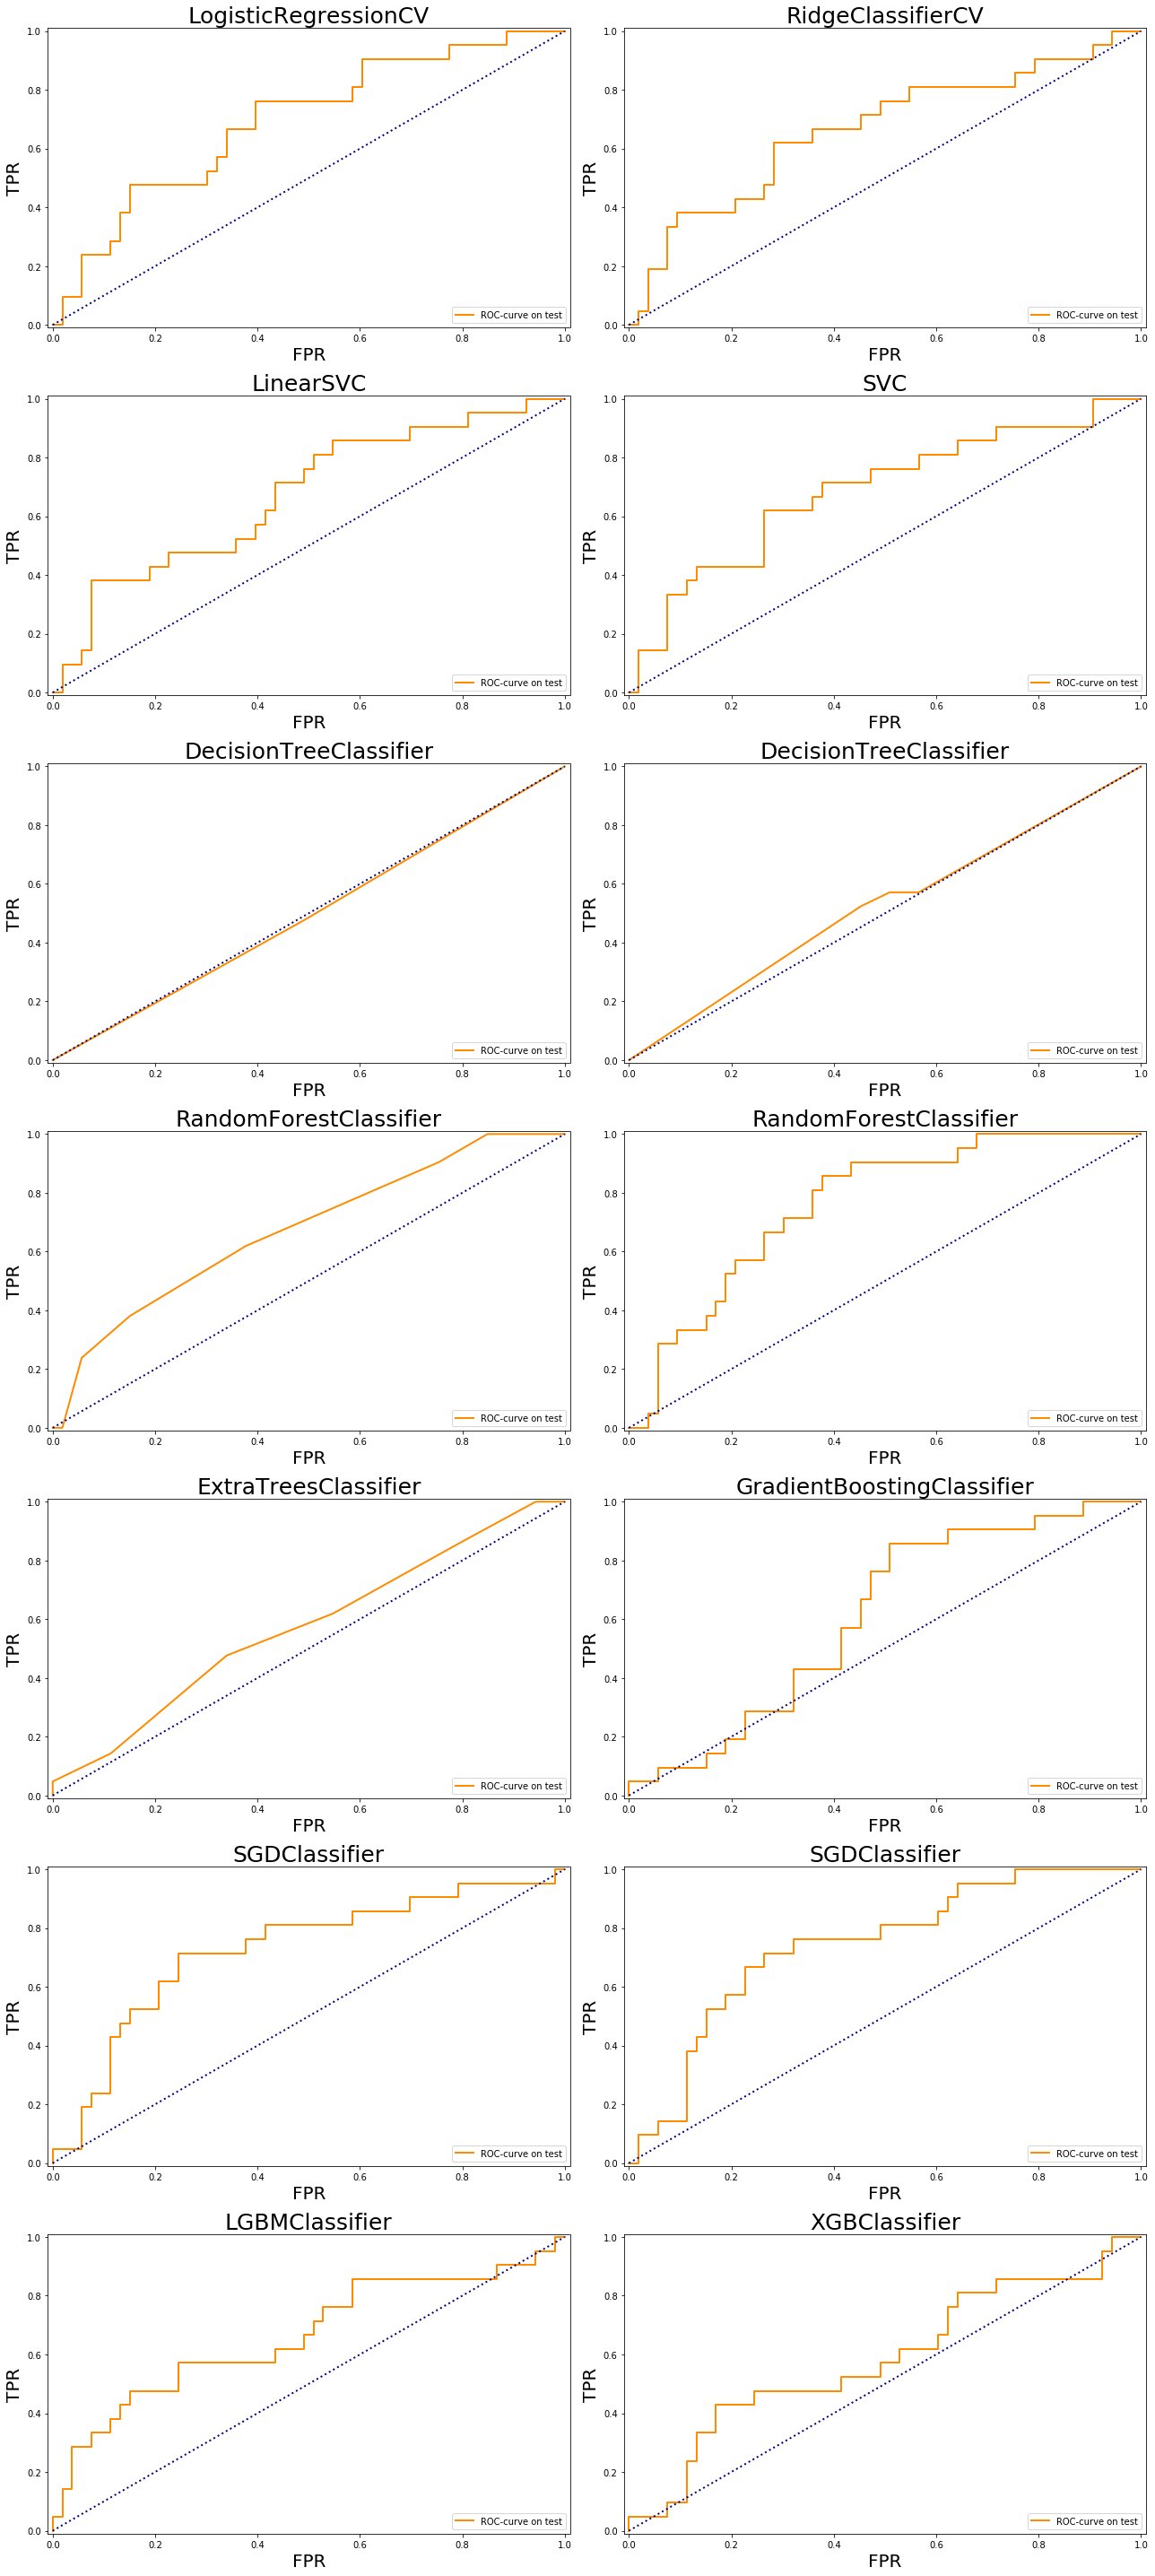

In [47]:
fig, axes = plt.subplots(ncols=2,
                         nrows=7, figsize=(18, 40))
for col, ax in zip(range(prediction.shape[1]), axes.flat):

    false_positive_rates, true_positive_rates, threshold_dt = roc_curve(y_test, prediction.iloc[:,col])
    # draw the first curve
    
    ax.plot(false_positive_rates, true_positive_rates,
              color='darkorange', lw=2, label = 'ROC-curve on test')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle=':')
    ax.set_xlabel('FPR', size=20)
    ax.set_ylabel('TPR', size=20)
    ax.set_title(prediction.columns[col], size=25)
    ax.set_ylim(-.01, 1.01)
    ax.set_xlim(-.01, 1.01)
    ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [48]:

param_svc = {
          'rbf_svm__C': np.linspace(1e-2, 1e2, 50), 
          'rbf_svm__gamma': np.linspace(1e-3, 1e2, 50), 
          'rbf_svm__kernel': ['rbf', 'linear'],
}

In [56]:
pca = KernelPCA()
svc = SVC()
pipe = Pipeline(steps=[('pca', pca), ('svc', svc)])

Cs = np.linspace(1e-2, 1e2, 50)
n_components = np.arange(5,50,5)
kern = ["linear", "poly", "rbf", "sigmoid"]
gamma = np.linspace(1e-3, 1e2, 50)

param_pipe = dict(pca__n_components=n_components,
                              svc__C=Cs, svc__kernel=kern, pca__kernel=kern, svc__gamma=gamma)

In [77]:
prediction.iloc[:,3].to_csv('predict.csv', index=False)